In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca Gambar

In [2]:
img = cv2.imread('202231064.jpg')

In [3]:
img.shape

(3061, 4160, 3)

In [4]:
[baris, kolom] = img.shape[:2]

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Deteksi Warna Pada Citra

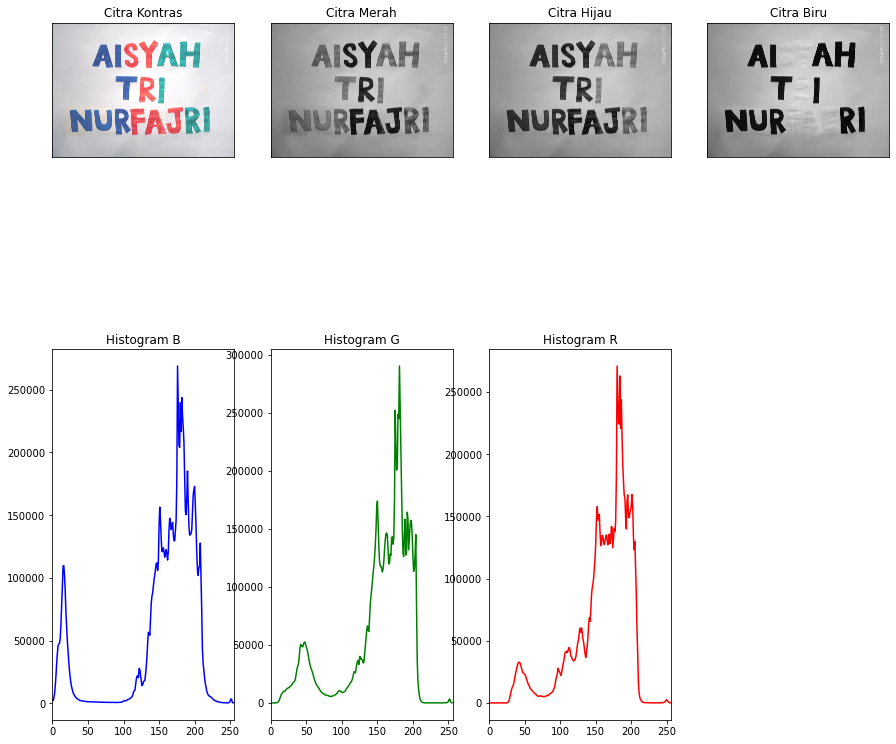

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(15, 15))

alpha = 1.0
beta = 50

# Kontras gambar
contrast_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Konversi ke RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R, G, B = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Menampilkan gambar
images = [contrast_img, R, G, B]
titles = ['Citra Kontras', 'Citra Merah', 'Citra Hijau', 'Citra Biru']
for i in range(4):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

# Menghitung dan menampilkan histogram untuk setiap kanal
color = ('b','g','r')
for i, col in enumerate(color):
    plt.subplot(2, 4, i+5)
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title('Histogram ' + col.upper())

plt.show()

# AMBANG BATAS TERKECIL SAMPAI DENGAN TERBESAR

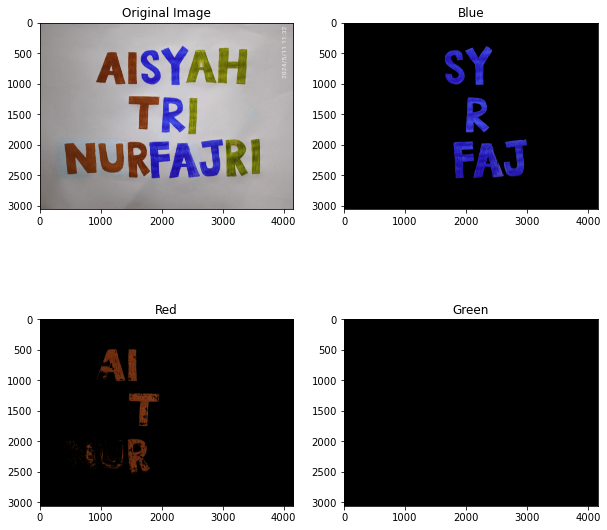

In [7]:
image = cv2.imread('202231064.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

blue_lower = np.array([100, 150, 0], np.uint8)
blue_upper = np.array([140, 255, 255], np.uint8)

red_lower = np.array([0, 100, 100], np.uint8)
red_upper = np.array([10, 255, 255], np.uint8)

green_lower = np.array([40, 100, 100], np.uint8)
green_upper = np.array([80, 255, 255], np.uint8)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

blue = cv2.inRange(hsv, blue_lower, blue_upper)
red = cv2.inRange(hsv, red_lower, red_upper)
green = cv2.inRange(hsv, green_lower, green_upper)

res_blue = cv2.bitwise_and(img, img, mask=blue)
res_red = cv2.bitwise_and(img, img, mask=red)
res_green = cv2.bitwise_and(img, img, mask=green)

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222)
plt.imshow(cv2.cvtColor(res_blue, cv2.COLOR_BGR2RGB))
plt.title('Blue')

plt.subplot(223)
plt.imshow(cv2.cvtColor(res_red, cv2.COLOR_BGR2RGB))
plt.title('Red')

plt.subplot(224)
plt.imshow(cv2.cvtColor(res_green, cv2.COLOR_BGR2RGB))
plt.title('Green')

plt.show()